# How well have players with a top 1000 speed run in Super Mario 64's 120 Star Challenge, do in an individual levels?

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import datetime
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import seaborn as sns

speedrunurl = 'https://www.speedrun.com/api/v1'

sm64 = pd.read_csv('./csv/sm64df.csv')

sm64.head()


/Users/a266490/Documents/data_analysis/speedrun_analysis/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


,place,player,speed_run_time,console,date_achieved
0,1,jn32931x,5728,w89rwelk,2024-11-04T05:39:48Z
1,2,zxzk1q9x,5730,w89rwelk,2025-03-18T23:22:54Z
2,3,j2ylqn68,5752,w89rwelk,2025-06-14T16:07:07Z
3,4,kjprmwk8,5762,w89rwelk,2024-07-07T17:33:13Z
4,5,1xyd46wx,5793,w89rwelk,2025-05-01T21:52:00Z


# So First, we need to call the api for a specific players personal best in specific stages in Super Mario 64

In [69]:
sm64_id = 'o1y9wo6q'
stage_category_id = 'zdnq4oqd'
player_personal_bests_sm64_url = 'https://www.speedrun.com/api/v1/users/USER/personal-bests'

sm64df_top1000 = sm64[:1001]
sm64df_top100 = sm64[:100]

users = []
levels = []
times = []
places = []
dates = []
platforms = []

for record in sm64df_top100.itertuples():
    base_url = player_personal_bests_sm64_url.replace('USER', record.player)

    player_level_results = requests.get(base_url)
    player_level_results = player_level_results.json()['data'] if 'data' in player_level_results.json() else None
    if player_level_results is None: 
        print(f'player {record.player} had no level data')
        continue
    for row_level in player_level_results:
        run = row_level['run']
        if (run['game'] == sm64_id and run['category'] == stage_category_id):
            user = record.player
            level = run['level']
            time = run['times']['primary_t']
            place = row_level['place']
            date = run['date']
            platform = run['system']['platform']

            levels.append(level)
            places.append(place)
            users.append(user)
            times.append(time)
            platforms.append(platform)
            dates.append(date)
        

sm64df_by_level = pd.DataFrame({
    'player': users,
    'level': levels,
    'speed_run_time_for_level': times,
    'place': places,
    'date_achieved': dates,
    'console': platforms
})


sm64df_by_level.head(25)

player [jp]アキラ (Akira) had no level data
player [jp]Melty had no level data


,player,level,speed_run_time_for_level,place,date_achieved,console
0,jn32931x,5d7776qd,354.83,3,2024-10-26,w89rwelk
1,jn32931x,5wk22gvw,285.84,2,2024-06-24,w89rwelk
2,jn32931x,rw6vvkp9,315.82,1,2024-06-22,w89rwelk
3,jn32931x,xd100vz9,310.07,1,2024-06-22,w89rwelk
4,jn32931x,xd466vq9,282.47,6,2024-06-13,w89rwelk
5,jn32931x,29vyy1q9,204.55,4,2024-05-30,w89rwelk
6,jn32931x,y9meekzd,233.90,5,2024-04-06,w89rwelk
7,jn32931x,592jjv7w,260.67,1,2024-04-03,w89rwelk
8,jn32931x,r9gzzkjd,375.85,26,2023-12-26,w89rwelk
9,jn32931x,495jjvmw,344.83,35,2023-12-23,w89rwelk


In [70]:
sm64df_by_level.to_csv('./csv/sm64df_by_level.csv', index=False)

In [71]:
console_url = 'https://www.speedrun.com/api/v1/levels/'
unique_level_ids = sm64df_by_level['level'].unique()
level_dic = {}

print(unique_level_ids)

for id in unique_level_ids:
    new_url = console_url + id

    levels = requests.get(new_url)
    levels = levels.json()['data']
    level_dic[id] = levels['name']

print(level_dic)

['5d7776qd' '5wk22gvw' 'rw6vvkp9' 'xd100vz9' 'xd466vq9' '29vyy1q9'
 'y9meekzd' '592jjv7w' 'r9gzzkjd' '495jjvmw' 'owokkgjd' 'kwjyyo0w'
 'ewpppkyw' 'o9x22m3w' 'rdq006ow']
{'5d7776qd': "Big Boo's Haunt", '5wk22gvw': 'Wet-Dry World', 'rw6vvkp9': 'Tiny-Huge Island', 'xd100vz9': 'Shifting Sand Land', 'xd466vq9': 'Rainbow Ride', '29vyy1q9': 'Tick Tock Clock', 'y9meekzd': "Snowman's Land", '592jjv7w': 'Tall, Tall Mountain', 'r9gzzkjd': 'Bob-omb Battlefield', '495jjvmw': 'Jolly Roger Bay', 'owokkgjd': 'Lethal Lava Land', 'kwjyyo0w': 'Hazy Maze Cave', 'ewpppkyw': 'Dire, Dire Docks', 'o9x22m3w': "Whomp's Fortress", 'rdq006ow': 'Cool, Cool Mountain'}


In [72]:
sm64df_by_level['level'] = sm64df_by_level['level'].replace(to_replace=level_dic)

sm64df_by_level.head()

,player,level,speed_run_time_for_level,place,date_achieved,console
0,jn32931x,Big Boo's Haunt,354.83,3,2024-10-26,w89rwelk
1,jn32931x,Wet-Dry World,285.84,2,2024-06-24,w89rwelk
2,jn32931x,Tiny-Huge Island,315.82,1,2024-06-22,w89rwelk
3,jn32931x,Shifting Sand Land,310.07,1,2024-06-22,w89rwelk
4,jn32931x,Rainbow Ride,282.47,6,2024-06-13,w89rwelk


## Need to merge my two dataframes together 

In [98]:
sm64df_by_level_two_columns = sm64df_by_level[['player', 'level', 'speed_run_time_for_level', 'place']]
sm64df_by_level_two_columns = sm64df_by_level_two_columns.rename(columns={'place': 'speed_run_level_ranking'})

# sm64df_by_level_two_columns.head()

sm64_df_with_total_and_level_times = pd.merge(left=sm64df_top100, right=sm64df_by_level_two_columns, left_on='player', right_on='player', how='inner')

sm64_df_with_total_and_level_times.head(46)

,place,player,speed_run_time,console,date_achieved,level,speed_run_time_for_level,speed_run_level_ranking
0,1,jn32931x,5728,w89rwelk,2024-11-04T05:39:48Z,Big Boo's Haunt,354.83,3
1,1,jn32931x,5728,w89rwelk,2024-11-04T05:39:48Z,Wet-Dry World,285.84,2
2,1,jn32931x,5728,w89rwelk,2024-11-04T05:39:48Z,Tiny-Huge Island,315.82,1
3,1,jn32931x,5728,w89rwelk,2024-11-04T05:39:48Z,Shifting Sand Land,310.07,1
4,1,jn32931x,5728,w89rwelk,2024-11-04T05:39:48Z,Rainbow Ride,282.47,6
5,1,jn32931x,5728,w89rwelk,2024-11-04T05:39:48Z,Tick Tock Clock,204.55,4
6,1,jn32931x,5728,w89rwelk,2024-11-04T05:39:48Z,Snowman's Land,233.90,5
7,1,jn32931x,5728,w89rwelk,2024-11-04T05:39:48Z,"Tall, Tall Mountain",260.67,1
8,1,jn32931x,5728,w89rwelk,2024-11-04T05:39:48Z,Bob-omb Battlefield,375.85,26
9,1,jn32931x,5728,w89rwelk,2024-11-04T05:39:48Z,Jolly Roger Bay,344.83,35


## Next, we pivot and need to sort our data by players overall speed run time

In [96]:
heatmap_pivot_table = pd.pivot_table(sm64_df_with_total_and_level_times, index='player', columns='level', values='speed_run_time_for_level', sort=False)

# sorted_120_star_times = sm64df_top100.sort_values(by='speed_run_time', ascending=True)['player']

# heatmap_pivot_table = heatmap_pivot_table.loc[sorted_120_star_times]

heatmap_pivot_table.head()

level,Big Boo's Haunt,Wet-Dry World,Tiny-Huge Island,Shifting Sand Land,Rainbow Ride,Tick Tock Clock,Snowman's Land,"Tall, Tall Mountain",Bob-omb Battlefield,Jolly Roger Bay,Lethal Lava Land,Hazy Maze Cave,"Dire, Dire Docks",Whomp's Fortress,"Cool, Cool Mountain"
player,,,,,,,,,,,,,,,
jn32931x,354.830,285.840,315.82,310.07,282.47,204.550,233.900,260.670,375.85,344.83,230.63,NaN,NaN,NaN,NaN
zxzk1q9x,NaN,285.960,318.80,312.16,338.86,207.660,234.260,NaN,374.90,341.26,234.66,294.90,368.20,NaN,NaN
j2ylqn68,356.600,290.660,319.26,311.77,290.30,213.660,234.160,265.600,373.97,340.60,235.96,NaN,NaN,214.93,287.230
kjprmwk8,355.450,291.990,NaN,313.61,298.03,NaN,234.910,266.860,371.37,335.36,232.16,NaN,NaN,208.90,282.310
1xyd46wx,358.285,294.275,319.19,332.36,315.83,212.305,237.485,267.195,374.92,338.55,232.83,297.06,363.29,209.52,280.625


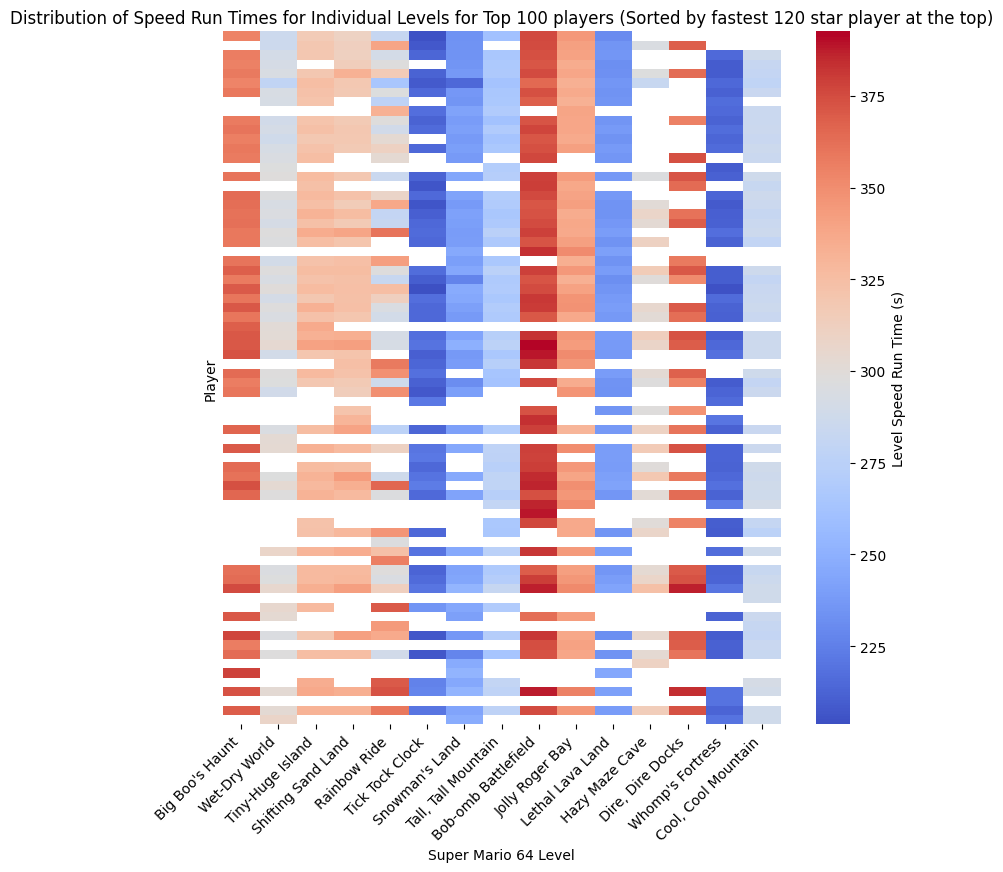

In [156]:
median_time = sm64_df_with_total_and_level_times['speed_run_time_for_level'].median()
mean_time = sm64_df_with_total_and_level_times['speed_run_time_for_level'].mean()
level_variation = sm64_df_with_total_and_level_times.groupby('level')['speed_run_time_for_level'].std().reset_index(name='std_time')

plt.figure(figsize=(9,9))

sns.heatmap(heatmap_pivot_table, cbar_kws={'label': 'Level Speed Run Time (s)'}, yticklabels=False, center=median_time, cmap='coolwarm', vmin=sm64_df_with_total_and_level_times['speed_run_time_for_level'].min(), vmax=sm64_df_with_total_and_level_times['speed_run_time_for_level'].max())

plt.ylabel('Player')
plt.xlabel('Super Mario 64 Level')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Speed Run Times for Individual Levels for Top 100 players (Sorted by fastest 120 star player at the top)')
plt.show()

## Overlaying the variation in speed run times for each level

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, "Big Boo's Haunt"),
  Text(1, 0, 'Bob-omb Battlefield'),
  Text(2, 0, 'Cool, Cool Mountain'),
  Text(3, 0, 'Dire, Dire Docks'),
  Text(4, 0, 'Hazy Maze Cave'),
  Text(5, 0, 'Jolly Roger Bay'),
  Text(6, 0, 'Lethal Lava Land'),
  Text(7, 0, 'Rainbow Ride'),
  Text(8, 0, 'Shifting Sand Land'),
  Text(9, 0, "Snowman's Land"),
  Text(10, 0, 'Tall, Tall Mountain'),
  Text(11, 0, 'Tick Tock Clock'),
  Text(12, 0, 'Tiny-Huge Island'),
  Text(13, 0, 'Wet-Dry World'),
  Text(14, 0, "Whomp's Fortress")])

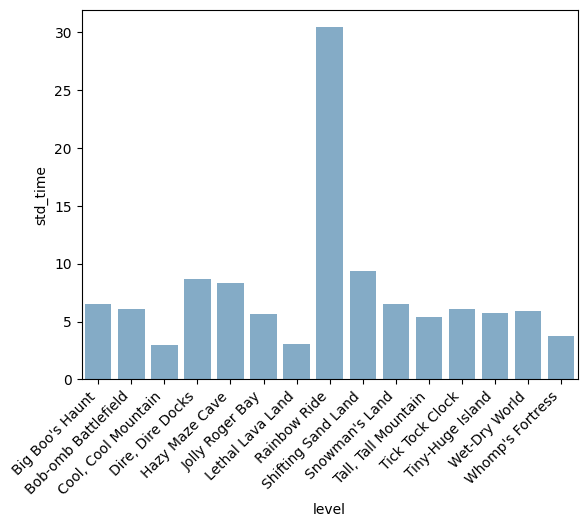

In [158]:
level_variation = sm64_df_with_total_and_level_times.groupby('level')['speed_run_time_for_level'].std().reset_index(name='std_time')

sns.barplot(x='level', y='std_time', data=level_variation, alpha=0.6)
plt.xticks(rotation=45, ha='right')
